# Predição de preços de diamantes

![](https://i.gifer.com/22Q7.gif)

In [1]:
# Pacotes básicos

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import files
upload = files.upload()

Saving diamonds.csv to diamonds.csv


In [4]:
df_diamonds = pd.read_csv('diamonds.csv')

In [5]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.5, 1.0, "Regression Line on Price vs 'y'")

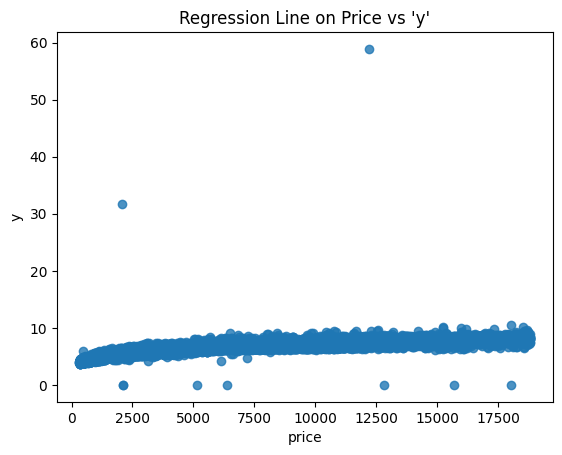

In [6]:
grafico1 =sns.regplot(x='price',y='y', data=df_diamonds, fit_reg=True)
grafico1.set_title("Regression Line on Price vs 'y'")

<Axes: xlabel='cut', ylabel='price'>

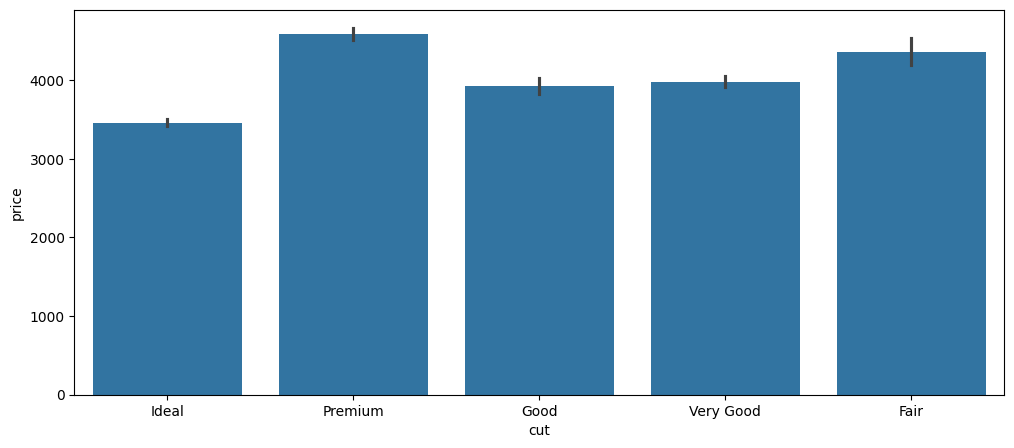

In [7]:
plt.figure(figsize = (12, 5))
sns.barplot(x='cut',
            y='price',
            data = df_diamonds)

In [8]:
print(df_diamonds.cut.unique())
print(df_diamonds.color.unique())
print(df_diamonds.clarity.unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [9]:
df_diamonds['cut'] = df_diamonds['cut'].map({'Ideal':5,'Premium':4,'Very Good':3,'Good':2,'Fair':1})

df_diamonds['color'] = df_diamonds['color'].map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})

df_diamonds['clarity'] = df_diamonds['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [10]:
from sklearn.model_selection import train_test_split

# Dividindo o dataset entre features e target (y)
X = df_diamonds.drop(columns=['price'])
y = df_diamonds['price']

# Divisão modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import MinMaxScaler

cols = X_train.columns

# Instanciando o encoder de treino
minmax_scaler = MinMaxScaler(feature_range=(0,1))

# Treinando o encoder e transformando os dados de entrada
X_train_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_train), columns=cols)

# Dados de teste
X_test_minmax = pd.DataFrame(minmax_scaler.transform(X_test), columns=cols)


In [12]:
X_train_minmax.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.376299,0.25,0.666667,0.142857,0.419444,0.403846,0.766294,0.139049,0.150000
1,0.168399,0.50,0.833333,0.142857,0.472222,0.326923,0.611732,0.110187,0.123270
2,0.187110,0.75,0.333333,0.428571,0.541667,0.288462,0.613594,0.111036,0.128931
3,0.270270,0.25,0.833333,0.142857,0.513889,0.423077,0.671322,0.121732,0.138994
4,0.274428,0.50,0.500000,0.571429,0.530556,0.269231,0.676909,0.124278,0.142453


In [13]:
X_test_minmax.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.008316,1.00,0.500000,0.857143,0.530556,0.250000,0.369646,0.067912,0.077673
1,0.079002,0.50,0.666667,0.714286,0.472222,0.269231,0.506518,0.092020,0.102516
2,0.041580,1.00,0.833333,0.714286,0.530556,0.230769,0.443203,0.080475,0.092767
3,0.047817,0.75,0.833333,0.714286,0.494444,0.269231,0.458101,0.083022,0.093711
4,0.280665,1.00,0.833333,0.142857,0.536111,0.230769,0.692737,0.125127,0.144969


In [14]:
# Linear Regressor

from sklearn.linear_model import LinearRegression

# Criando e Treinando o modelo
regr = LinearRegression()
regr.fit(X_train_minmax, y_train,)

# Predições no conjunto de teste
y_pred = regr.predict(X_test_minmax)

# The coefficients
print('Coefficients: \n', regr.coef_)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))




Coefficients: 
 [51842.25583567   495.44449098  1943.23049203  3517.64782071
 -2919.05436559 -1408.07821202 -9379.15136675  1348.61670078
  -499.46910876]
Mean squared error: 1499636.69
Variance score: 0.91


In [15]:
# Lasso

from sklearn.linear_model import Lasso

# Criando e Treinando o modelo
model = Lasso(alpha=0.1)
model.fit(X_train_minmax, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test_minmax)

# The coefficients
print('Coefficients: \n', model.coef_)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))



Coefficients: 
 [51372.68899378   505.00167177  1939.61989665  3521.94338627
 -2776.15301987 -1291.52423865 -8800.82301316     0.
    -0.        ]
Mean squared error: 1499791.18
Variance score: 0.91


In [16]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Criando e Treinando o modelo
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train_minmax, y_train)

# Predições no conjunto de teste
y_pred = dtr.predict(X_test_minmax)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))


Mean squared error: 540299.75
Variance score: 0.97


In [17]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Criando e Treinando o modelo
rfr = DecisionTreeRegressor(random_state=0)
rfr.fit(X_train_minmax, y_train)

# Predições no conjunto de teste
y_pred = rfr.predict(X_test_minmax)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))


Mean squared error: 540299.75
Variance score: 0.97


In [18]:
# KNeighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

# Criando e Treinando o modelo
model = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
model.fit(X_train_minmax, y_train)

# Predições no conjunto de teste
y_pred = model.predict(X_test_minmax)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))

Mean squared error: 435756.33
Variance score: 0.97


In [19]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=8,
    random_state=1)

boost.fit(X_train_minmax, y_train)

# Avaliando modelo

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean squared error: %0.2f" % mean_squared_error(y_test, y_pred))
print("Variance score: %0.2f" % r2_score(y_test, y_pred))


Mean squared error: 435756.33
Variance score: 0.97
